### Imports

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Feature Engineering

---



In [2]:
data = pd.read_csv('/content/all_data.csv')
data = data.drop(['Unnamed: 0', 'Hurricane activity'], axis=1) # drop the label column

In [3]:
# How many NaN values?
null_info = data.isnull().sum()
null_info

NAO(J)        257
NAO            33
EA_WR          33
NP             30
NBRA          282
AMO(s)         69
TNA             9
PWR            21
SWMRR         144
BEST            0
PNA            33
TNI            11
SR             60
AMM             0
AMO             9
SF             45
Niño(3)       33
SOI            45
TSA             9
Niño(4)       33
QBO             9
PDO            12
GMOT            0
Niño(3.4)     33
EP_NP         105
AT            168
NOI           187
Niño(1+2)     33
WHWP            9
CIP           276
TPI(IPO)      144
Month           0
AO             33
WP             33
CAR            59
ONI            34
AAO           384
ENSO          382
MEI           381
GIAM          226
NTA            59
dtype: int64

In [4]:
# find and drop indices from dataframe that have more than a 100 missing entries
null_indices = list()
for idx, elem in enumerate(null_info):
  if elem > 100: null_indices.append(null_info.index[idx])
data = data.drop(null_indices, axis=1)

In [5]:
# Drop NaN values of the remaining indices 
data = data.dropna()
data

,NAO,EA_WR,NP,AMO(s),TNA,PWR,BEST,PNA,TNI,SR,...,GMOT,Niño(3.4),Niño(1+2),WHWP,Month,AO,WP,CAR,ONI,NTA
36,-0.42,-0.74,1008.32,0.090,0.06,-0.582,-1.13,-1.18,1.315,2.0,...,-0.44,-1.30,-0.46,-0.17,1,-0.085,-0.07,-0.46,-0.82,-0.08
37,0.35,-1.66,1011.16,0.089,-0.17,-0.715,-0.69,-2.11,1.461,2.0,...,-0.49,-1.04,-0.91,-0.30,2,-0.400,-0.58,-0.49,-0.54,-0.12
38,-1.47,0.11,1015.69,0.087,-0.07,-0.670,-0.24,-1.09,1.590,37.0,...,-0.19,-0.38,-0.75,-0.93,3,-1.934,-0.29,-0.50,-0.17,-0.08
39,-0.38,-2.31,1011.91,0.087,0.17,-0.665,0.33,0.47,1.457,-23.0,...,-0.09,-0.23,-0.25,-0.70,4,-0.776,-0.19,-0.42,0.18,0.03
40,-0.50,0.93,1012.74,0.086,0.14,-0.535,0.71,1.19,1.615,119.0,...,0.00,-0.01,0.17,-0.93,5,-0.863,0.70,-0.28,0.36,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,-0.31,-0.93,1009.24,0.171,0.46,0.376,-0.14,1.44,0.690,1.0,...,1.31,-0.76,0.12,3.65,11,-0.611,1.01,0.47,-0.67,0.31
827,0.35,1.52,1014.11,0.174,0.52,0.332,-0.39,-0.65,1.097,-3.0,...,1.25,-0.50,0.43,1.05,12,1.786,0.97,0.45,-0.56,0.41
828,0.05,0.63,1008.76,0.176,0.49,0.310,-0.26,-0.29,1.447,-4.0,...,1.26,-0.43,0.93,-0.03,1,0.942,0.55,0.46,-0.34,0.29
829,0.69,1.14,1008.15,0.178,0.23,0.203,0.11,-0.05,1.465,-7.0,...,1.49,-0.08,1.36,0.43,2,0.340,-0.15,0.45,-0.16,0.23


In [6]:
# Standarize data 
data_stdz = (data-data.mean())/data.std()
data_stdz

,NAO,EA_WR,NP,AMO(s),TNA,PWR,BEST,PNA,TNI,SR,...,GMOT,Niño(3.4),Niño(1+2),WHWP,Month,AO,WP,CAR,ONI,NTA
36,-0.307286,-0.701752,-0.944256,0.760245,-0.093620,-1.397317,-1.203014,-1.049330,1.223580,-0.223129,...,-1.913876,-1.289344,-0.199380,-0.315970,-1.585099,0.026364,-0.076867,-2.108720,-1.021985,0.018719
37,0.398496,-1.536418,-0.310529,0.753539,-0.723903,-1.833390,-0.763315,-1.952131,1.330148,-0.223129,...,-2.036920,-0.992859,-0.607741,-0.382280,-1.296006,-0.284963,-0.543770,-2.247310,-0.687853,-0.094447
38,-1.269716,0.069407,0.700311,0.740129,-0.449867,-1.685847,-0.313622,-0.961962,1.424308,0.009943,...,-1.298659,-0.240243,-0.462546,-0.703627,-1.006914,-1.801076,-0.278276,-2.293506,-0.246321,0.018719
39,-0.270622,-2.126128,-0.143171,0.740129,0.207819,-1.669453,0.255989,0.552414,1.327229,-0.389609,...,-1.052572,-0.069194,-0.008812,-0.586310,-0.717822,-0.656578,-0.186727,-1.923933,0.171344,0.329925
40,-0.380614,0.813349,0.042038,0.733423,0.125608,-1.243215,0.635729,1.251357,1.442556,0.555997,...,-0.831093,0.181678,0.372324,-0.703627,-0.428729,-0.742564,0.628064,-1.277179,0.386143,0.471382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,-0.206460,-0.874128,-0.738964,1.303379,1.002524,1.743726,-0.213690,1.494045,0.767382,-0.229788,...,2.392647,-0.673568,0.326951,1.632514,1.305825,-0.493502,0.911868,2.187574,-0.842985,1.122085
827,0.398496,1.348624,0.347745,1.323495,1.166945,1.599461,-0.463520,-0.534830,1.064458,-0.256425,...,2.244995,-0.377083,0.608266,0.306320,1.594917,1.875549,0.875248,2.095180,-0.711719,1.405000
828,0.123516,0.541175,-0.846073,1.336906,1.084734,1.527328,-0.333609,-0.185359,1.319929,-0.263084,...,2.269603,-0.297260,1.062000,-0.244560,-1.585099,1.041390,0.490740,2.141377,-0.449187,1.065502
829,0.710140,1.003870,-0.982191,1.350317,0.372241,1.176502,0.036139,0.047622,1.333068,-0.283062,...,2.835604,0.101855,1.452211,-0.009926,-1.296006,0.446409,-0.150107,2.095180,-0.234388,0.895754


# **Calculate Pearson Correlation:** 

The simple idea is to obtain correlation between each two features and choose the least correlated ones. By eliminating the redundant features we are esentially reducing the dimensionality of the data. 

In this process, we utilize the absolute value of correlation result: `cr_abs`. We do this because we are only interested in assessing how strongly two features are correlated, we are not interested differentiating positivity and negativity of correlation result.

In this part, we are visualizing both results/matrices of correlation and absolute correlation: `cmap`.


## **Result Interpretation:**

In the absolute correlation map, we see the index (feature) `QBO` is not correlated with any other feature, therefore we may initially select it as a feature. Additionally, we see the index (feature) `Niño(4)` is highly correlated with many other features, therefore we may discard it.

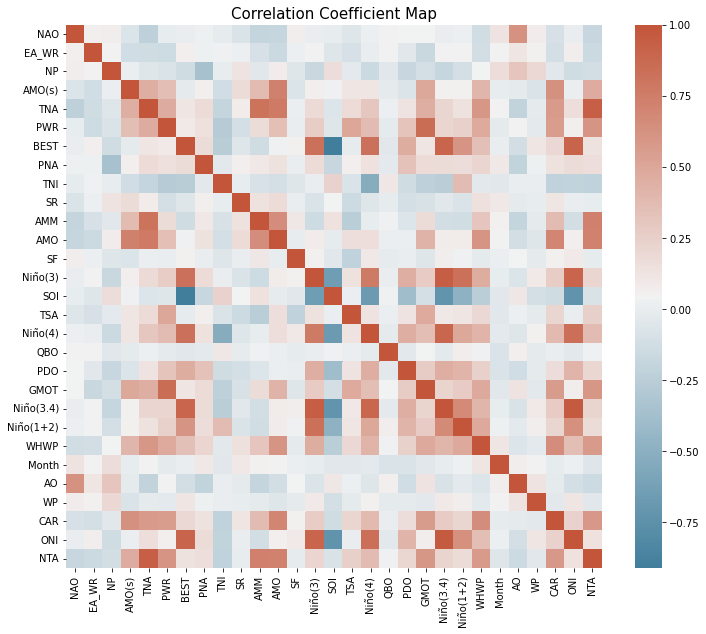

In [12]:
###############################################################################
# Correlation
###############################################################################
cr = data_stdz.corr() # Calculate correlation between each two features (across all features).

# Plot
f, ax = plt.subplots(figsize=(12, 10)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cr, annot=False, cmap=cmap)
ax.set_title('Correlation Coefficient Map', size=15);

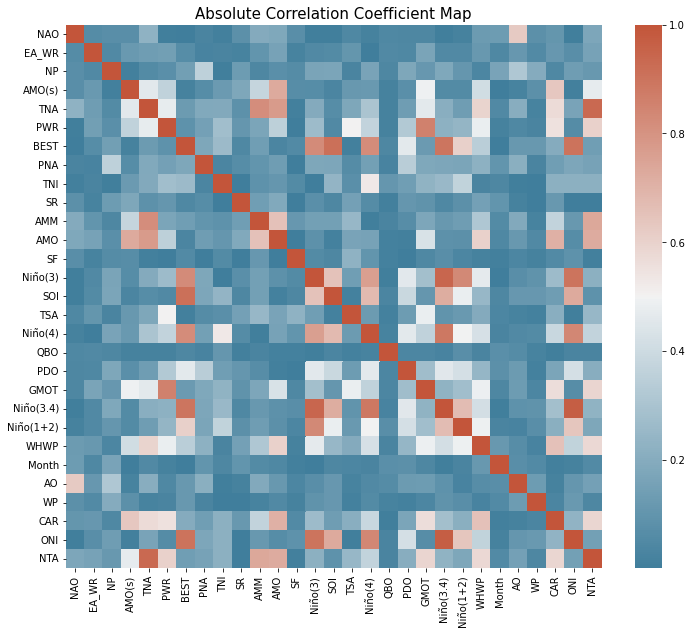

In [11]:
###############################################################################
# Absolute Correlation
###############################################################################
cr_abs = cr.abs() # Calculate absolute correlation

# Plot
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cr_abs, annot=False, cmap=cmap)
ax.set_title('Absolute Correlation Coefficient Map', size=15);

# **Getting weather indeces (features) and setting correlation matrix for post-processing:**

This part is only a preparation for a Numpy matrix and list of indeces (features).

In [13]:
###############################################################################
# Prepare/set variables
###############################################################################
cr_numpy = cr_abs.values # Convert absolute correlation dataframe into numpy array
indeces = cr_abs.columns.values.tolist() # Get indeces

# **Ordering Features from the Least Correlated to the Most Correlated:**

For visualization purposes we order the features from least to most correlated. The critereia used has been the cummulative correlation from each index with the remaining ones. This cummulative correlation is called `correlation_score`. 

## **Result and Conclusion:**

In the resultant map, we see that `QBO` feature is on the far left which means that is has the lowest score (as we also interpreted in the previous part), while `Niño(4)` is located on the far right which means that it has the highest score. 

To reduce the dimensionality we may select the leat `N` correlated features. These will capture the most information for `N` features. For instance, if `N=5` we may select `QBO`, `SF`, `Month`, `WP`, and `SR` for further regression/classification tasks.

In [18]:
###############################################################################
# Calculate correlation score
###############################################################################
cr_numpy = cr_abs.values # Convert absolute correlation dataframe into numpy array
Correlation_score = cr_numpy.sum(axis=1) # Calculate correlation score for each index


###############################################################################
# Re-order features from least correlated to highest correlated
###############################################################################
indeces = cr_abs.columns.values.tolist()
zipped_lists = zip(Correlation_score, indeces) # Zipping correlaion scores and feature labels
sorted_zipped_lists = sorted(zipped_lists) # Sorting according correlaion scores
ordered_indecis = [element for _, element in sorted_zipped_lists] # Ordered indeces
Correlation_score_ordered = Correlation_score[np.argsort(Correlation_score).tolist()] # Ordered scores


###############################################################################
# Printing result
###############################################################################
cs_df = pd.DataFrame(data = Correlation_score_ordered, 
                     index = ordered_indecis, 
                     columns = ['Score'])

cs_df


,Score
QBO,1.930285
SF,2.290866
Month,2.432616
WP,2.608006
SR,3.095351
EA_WR,3.180877
NAO,3.482803
NP,4.235625
AO,4.255364
TSA,4.762831


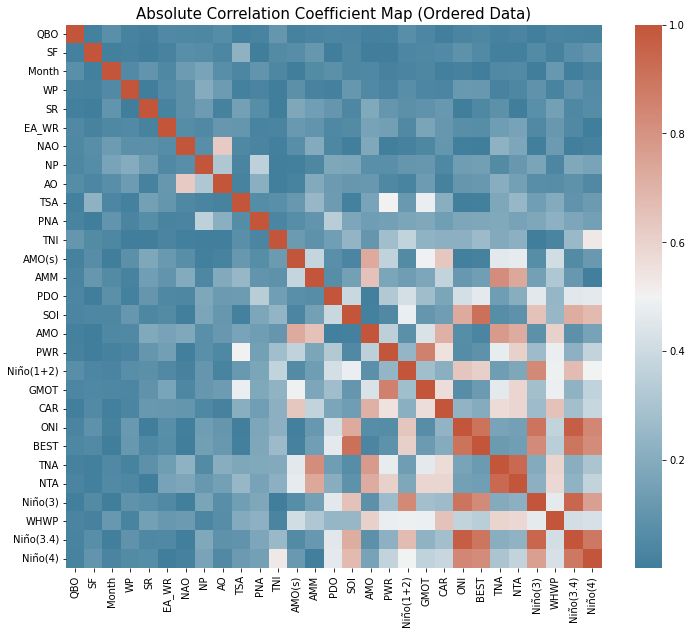

In [19]:
###############################################################################
# Reordering the dataframe
###############################################################################
df_ordered = data_stdz
df_ordered = df_ordered[ordered_indecis]


###############################################################################
# Plot
###############################################################################
cr = df_ordered.corr()
cr_abs = cr.abs()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cr_abs, annot=False, cmap=cmap)
ax.set_title('Absolute Correlation Coefficient Map (Ordered Data)',size=15);